By: Dominikus Krisna Herlambang | ©2022

### The problem

> Churn is an event or behavior of customers switching from a product after (within a certain period of time) subscribing to the product. Products can be goods or services, such as internet networks, telecommunications providers, and the like. In this case, the product being analyzed is a telecommunications company. The churn scheme can be explained in several stages. The first stage is the stage when the customer subscribes to the product. The second stage is routine, or customer behavior or customer feedback on the product used during a certain period. After that, in the third stage, there are two types, retention (re-subscribing) or churn (switching or unsubscribing). Every company definitely wants to minimize churn and maximize retention. One solution that can be used is to use customer churn prediction. With this, the company can find out the characteristics that tend to switch or unsubscribe.

### Data Description

1. Gender: Customer gender (Male, Female)
2. Partner: Customer marital status (yes, no)
3. Tenure: Length of subscription (integer; months)
4. PhoneService: Does the customer use a telephone (yes, no)
5. PaperlessBilling: Does the customer use paperless billing (yes, no)
6. MonthlyCharges: Monthly charges (numeric; usd)
7. Churn: Does the customer unsubscribe or not (yes, no)

> In this case we will predict Churn as a response variable.

## 1. Import Libraries and Data

IMPORT PACKAGES

In [ ]:
# Import Package
import os
import pandas as pd
import numpy as np

# Package for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Package for cleaning data, modelling data, dan evaluation model
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Create a path to identify the directory location
path = 'data-project/'

IMPORT DATA

In [ ]:
# Load data
df = pd.read_csv(os.path.join(path, "Churn_Data.csv"), encoding='utf-8')
df.head()

,gender,Partner,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn
0,Female,Yes,1,No,Yes,29.85,No
1,Male,No,34,Yes,No,56.95,No
2,Male,No,2,Yes,Yes,53.85,Yes
3,Male,No,45,No,No,42.30,No
4,Female,No,2,Yes,Yes,70.70,Yes


From the data above, it can be seen that:

x = gender, Partner, tenure, Phone Service, Paperless Billing, Monthly Charges

y = Churn

## 2. Exploratory Data Analysis (EDA)

In [ ]:
# Check the information contained in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   Partner           7043 non-null   object 
 2   tenure            7043 non-null   int64  
 3   PhoneService      7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 385.3+ KB


From the information there is no missing value. Next, it will be found out whether the customers who stop subscribing are more than those who do not or vice versa?

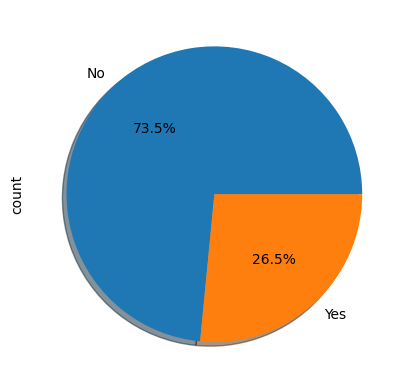

In [ ]:
# Looking for label/class comparison
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

From the pie-chart, it can be said that those who do not stop subscribing are more, this data is slightly unbalanced. To find out for sure you can use the proportion test (to decide whether the data is balanced or not).

In [ ]:
# Descriptive analysis
df.describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


From the tenure variable, the most loyal customer is 72 months, and the average subscriber is 32 months. While in the monthly charge variable, the highest bill is 118 USD, and the average bill is 64 USD.

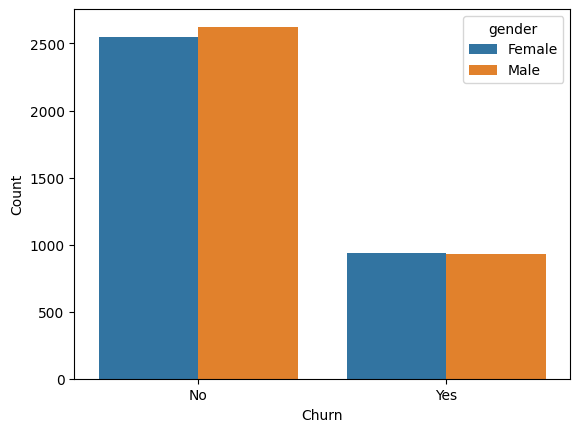

In [ ]:
# Create a Crosstab between Churn and Gender
gender_churn = pd.crosstab(df['Churn'], (df['gender']))

# Make crosstab results into a dataframe
stacked = gender_churn.stack().reset_index().rename(columns={0:'Count'})
sns.barplot(x=stacked.Churn, y=stacked.Count, hue=stacked.gender)
plt.show()

There can be no significant difference in this regard.

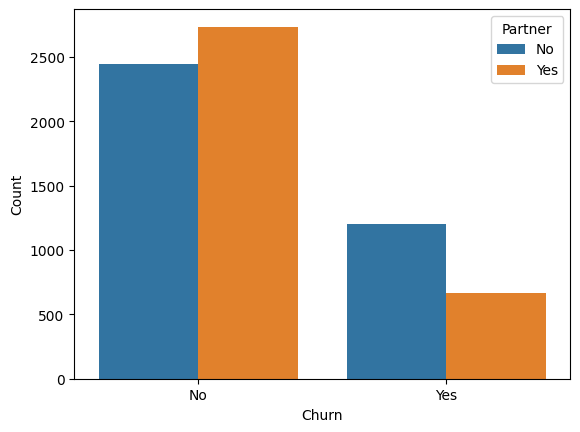

In [ ]:
# Create a Crosstab between Churn and Partners
married_churn = pd.crosstab(df['Churn'], (df['Partner']))

# Make crosstab results into a dataframe
stacked = married_churn.stack().reset_index().rename(columns={0:'Count'})
sns.barplot(x=stacked.Churn, y=stacked.Count, hue=stacked.Partner)
plt.show()

Judging from the crosstab barplot, married customers are less likely to unsubscribe, while unmarried customers are more likely to unsubscribe.

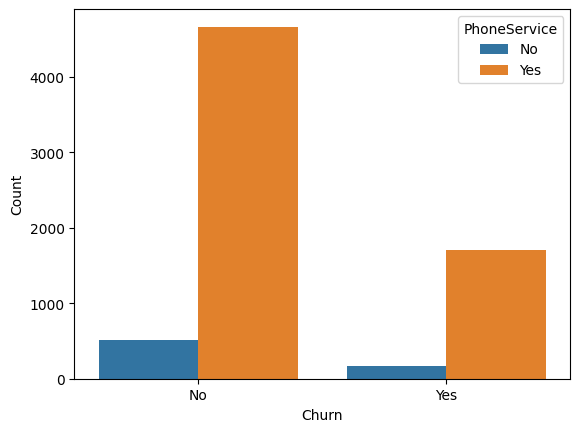

In [ ]:
# Create a Crosstab between Churn and PhoneService
ps_churn = pd.crosstab(df['Churn'], (df['PhoneService']))

# Make crosstab results into a dataframe
stacked = ps_churn.stack().reset_index().rename(columns={0:'Count'})
sns.barplot(x=stacked.Churn, y=stacked.Count, hue=stacked.PhoneService)
plt.show()

Customers whose homes have telephone services, most of them do not stop subscribing, but there are also quite a few customers who stop subscribing with the status of phone service Yes. Overall, customers with telephone services at home tend not to stop subscribing.

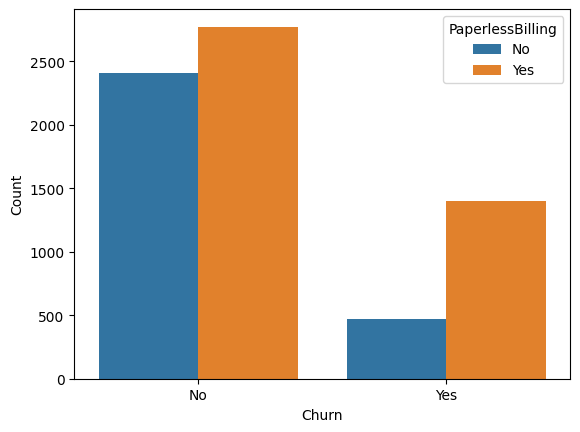

In [ ]:
# Create a Crosstab between Churn and Paperless Billing
pb_churn = pd.crosstab(df['Churn'], (df['PaperlessBilling']))

# Make crosstab results into a dataframe
stacked = pb_churn.stack().reset_index().rename(columns={0:'Count'})
sns.barplot(x=stacked.Churn, y=stacked.Count, hue=stacked.PaperlessBilling)
plt.show()

<Axes: xlabel='Churn', ylabel='tenure'>

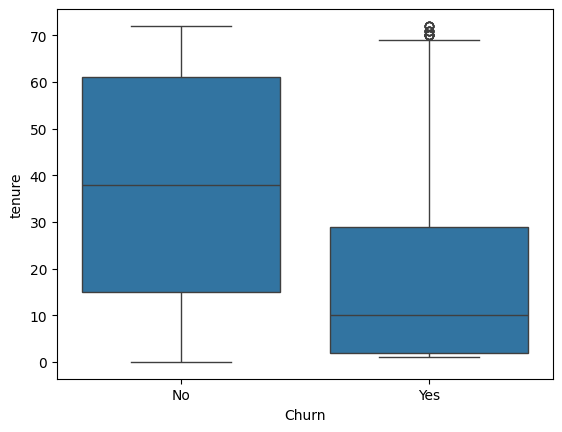

In [ ]:
# Boxplot Tenure with Churn
sns.boxplot(x="Churn", y="tenure", data=df)

The boxplot shows that customers who stop subscribing have a smaller average tenure than those who do not subscribe. The average customer who stops subscribing is 10 months after their first use. But there is also an anomalous value, namely customers who have subscribed for 70 months, but still stop subscribing.

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

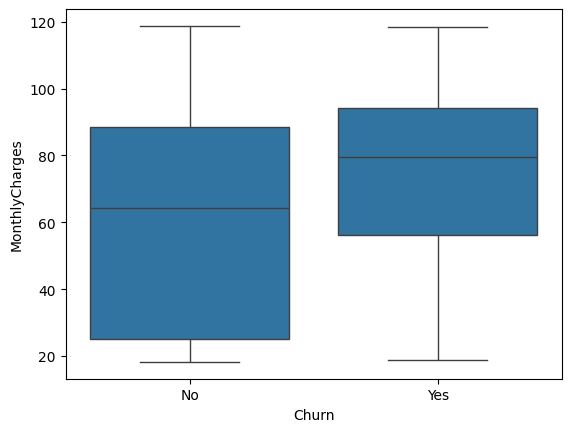

In [ ]:
# Boxplot Tenure with Churn
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)

The boxplot image shows that the higher the billing costs, the more likely customers are to stop subscribing.

## 3 Preprocessing

Label Encoder

In [ ]:
kategori = ['gender','Partner','PhoneService','PaperlessBilling','Churn']
df_cat = df[kategori]
df_cat.head()

,gender,Partner,PhoneService,PaperlessBilling,Churn
0,Female,Yes,No,Yes,No
1,Male,No,Yes,No,No
2,Male,No,Yes,Yes,Yes
3,Male,No,No,No,No
4,Female,No,Yes,Yes,Yes


In [ ]:
# Convert to numeric form
encoded_data = LabelEncoder()

for feature in kategori:
        if feature in df.columns.values:
            df[feature] = encoded_data.fit_transform(df[feature])

df.head()

,gender,Partner,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn
0,0,1,1,0,1,29.85,0
1,1,0,34,1,0,56.95,0
2,1,0,2,1,1,53.85,1
3,1,0,45,0,0,42.30,0
4,0,0,2,1,1,70.70,1


Categorical variables must be recoded into a numeric integer in order to be modeled into a logistic regression model.

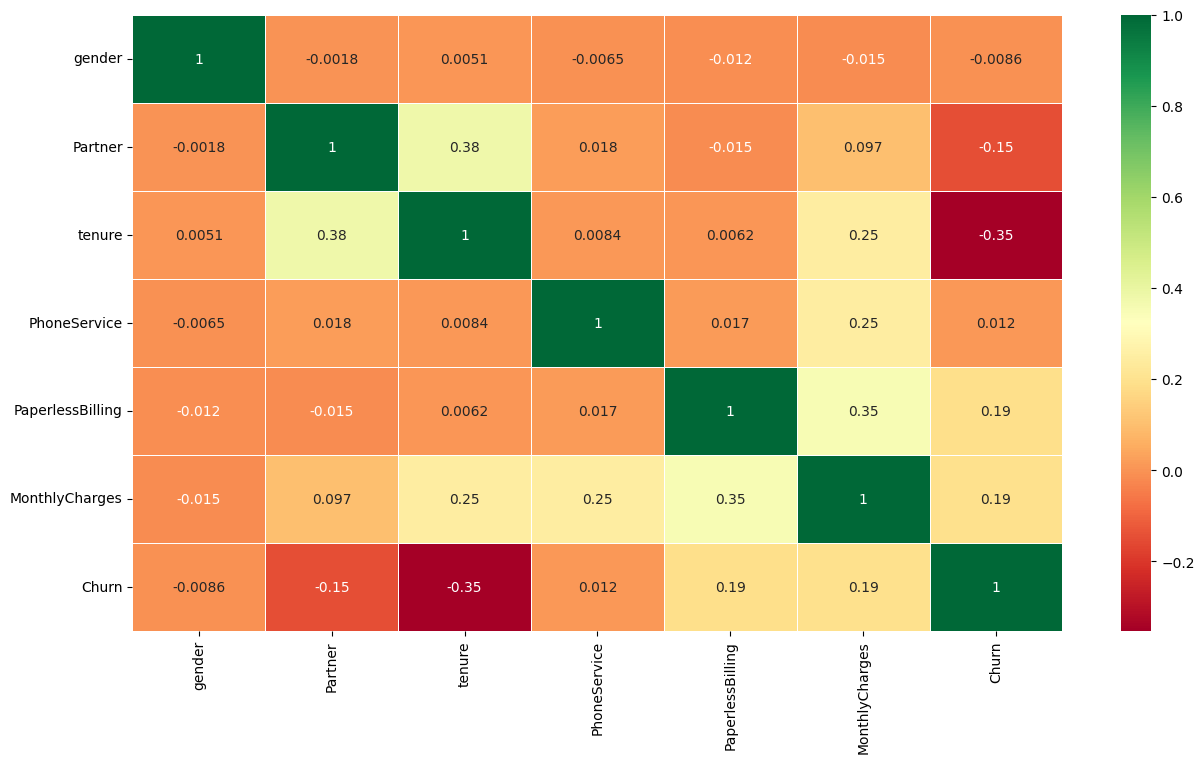

In [ ]:
# Check correlation, assuming that the data is of interval-ratio type.
# Perform correlation value calculations by assuming the data is interval data.
sns.heatmap(df.corr(),linewidths=.5,annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

If viewed based on the correlation matrix, the highest value is at a figure of more than absolute 0.3, which according to theory is generally sufficient to be said to have a strong correlation.

## 4. Building a Classification Model

SHARING TRAINING TEST DATA

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X Train : ", len(X_train))
print("y Train : ", len(y_train))
print("X Test : ", len(X_test))
print("t Test : ", len(y_test))

X Train :  4930
y Train :  4930
X Test :  2113
t Test :  2113


Using testing data amounting to 30 percent of the total data, and training data amounting to 70 percent of the total data.

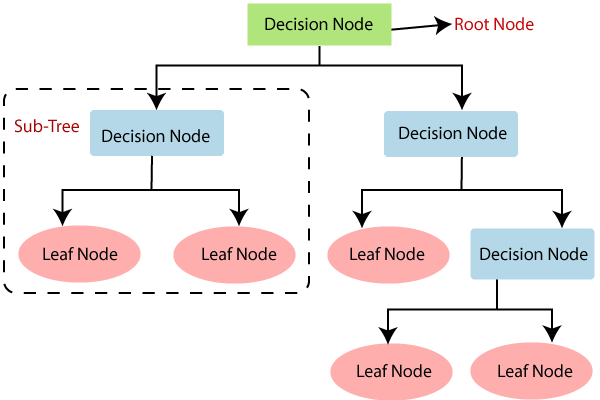

Advantages of Decision Tree:
- Easy to interpret: Boolean logic and representation of decision trees make it easy for users to understand and master them.

- Minimal Data Preparation: Decision Tree can handle and handle various types of data—such as discrete or continuous, and continuous values ​​will be converted into categorical through limits/thresholds.

- More Flexible: Decision trees can be used for classification and regression. In addition, Decision Tree is also insensitive to dependencies on relations or relationships between attributes.

Decision Tree Weaknesses:
- Prone to overfitting: Complex decision tree algorithms tend to overfit and cannot optimally handle new data.

- Sensitive to variance: variance in data can produce very different Decision Tree results.

- More costly: with the approach of a complex Decision Tree algorithm, the Decision Tree resource will be greater than other algorithms.